In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [72]:
img = cv2.imread(filename='goldenGate.jpg')
cv2.imshow(winname='Golden Gate', mat=img), cv2.waitKey(0)

(None, -1)

In [73]:
img.shape

(2448, 3264, 3)

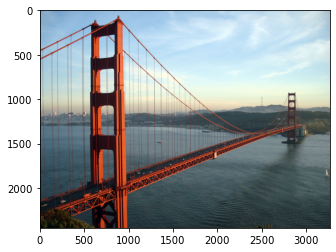

In [74]:
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(X=img), plt.show();

## Resmi Grayscale'e dönüştür.

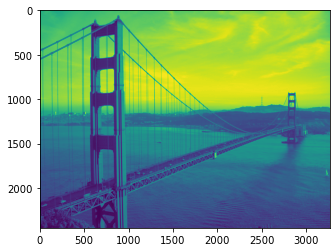

In [75]:
gray = cv2.cvtColor(src=img, code=cv2.COLOR_RGB2GRAY)
plt.imshow(X=gray), plt.show();

## Resme Blur (Bulanıklaştırma) uygula.

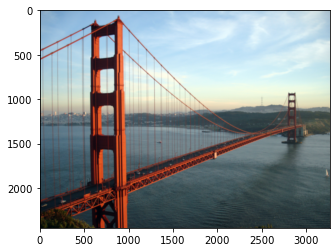

In [76]:
blur = cv2.blur(src=img, ksize=(10, 10))
plt.imshow(X=blur), plt.show();

## Resmi yatay olarak döndür.

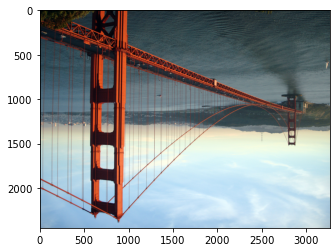

In [77]:
flip_img = cv2.flip(src=img, flipCode=0)
plt.imshow(X=flip_img), plt.show();

## Resimde belirlediğin iki bölgeyi kırp.

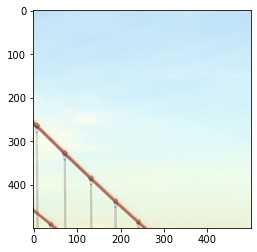

In [78]:
clipping1 = img[500:1000, 1500:2000]
plt.imshow(X=clipping1), plt.show();

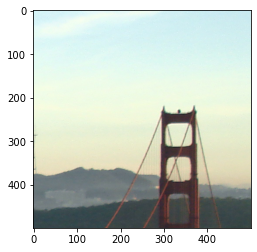

In [79]:
clipping2 = img[700:1200, 2500:3000]
plt.imshow(X=clipping2), plt.show();

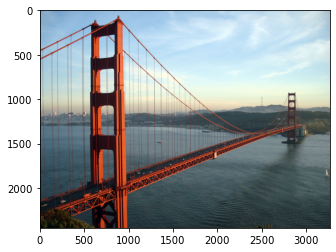

In [80]:
plt.imshow(X=img), plt.show();

## Belirlediğin iki noktaya dikdörtgen ekle.

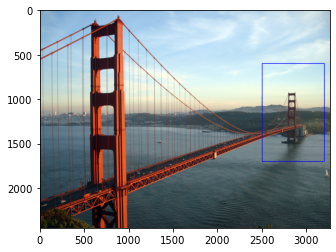

In [81]:
angle = cv2.rectangle(img=img, pt1=(2500, 600), pt2=(3200, 1700), color=(0, 0, 255), thickness=5)
plt.imshow(X=angle), plt.show();

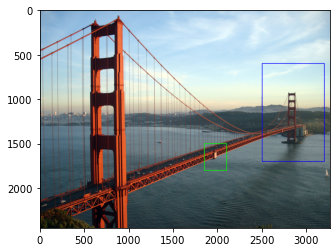

In [82]:
angle2 = cv2.rectangle(img=img, pt1=(1850, 1500), pt2=(2100, 1800), color=(0, 255, 0), thickness=5)
plt.imshow(X=angle2), plt.show();

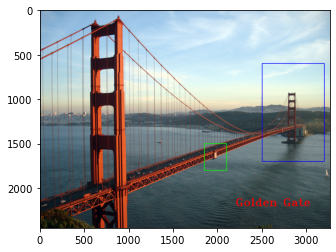

In [83]:
text = cv2.putText(img=img, text='Golden Gate', org=(2200, 2200), color=(255,0,0), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=4, thickness=5)
plt.imshow(X=text), plt.show();

## Renk kanallarını ayrıştır.

In [84]:
r, g, b = cv2.split(m=img)
print(r, g, b)

[[123 120 124 ... 166 171 170]
 [124 122 124 ... 167 167 167]
 [124 123 123 ... 169 165 166]
 ...
 [  0   0   0 ...  21  25  22]
 [  0   0   0 ...  21  20  20]
 [  3   0   0 ...  19  19  22]] [[154 151 155 ... 186 191 190]
 [154 153 155 ... 187 187 187]
 [154 153 154 ... 189 185 186]
 ...
 [  8   7   7 ...  30  34  33]
 [ 11  10   8 ...  30  31  31]
 [ 14  11   8 ...  28  29  35]] [[182 179 184 ... 197 202 201]
 [182 181 184 ... 198 198 198]
 [182 181 183 ... 198 194 195]
 ...
 [  7   6   6 ...  37  39  37]
 [  7   6   5 ...  37  37  37]
 [ 10   7   5 ...  37  38  43]]


## Renk kanallarını birleştir.

In [85]:
img = cv2.merge(mv=[r, g, b])
img.shape

(2448, 3264, 3)

## Resmi yeniden boyutlandır.

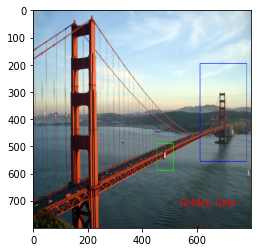

In [86]:
resized = cv2.resize(src=img, dsize=(800, 800))
plt.imshow(X=resized), plt.show();

## Resmi yatay ve dikey olarak aynala.

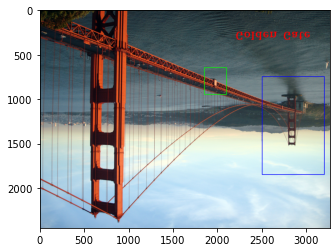

In [87]:
horizontal = cv2.flip(src=img, flipCode=0)
plt.imshow(X=horizontal), plt.show();

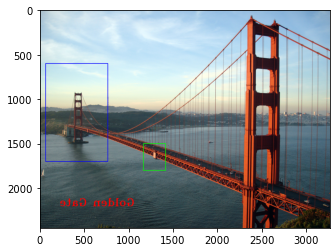

In [88]:
vertically = cv2.flip(src=img, flipCode=1)
plt.imshow(X=vertically), plt.show();

## Resmin histogramını oluştur ve görselleştir.

In [89]:
img.shape

(2448, 3264, 3)

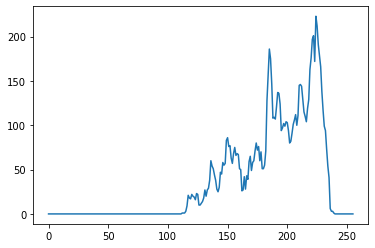

In [90]:
hist = cv2.calcHist(images=img, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist);

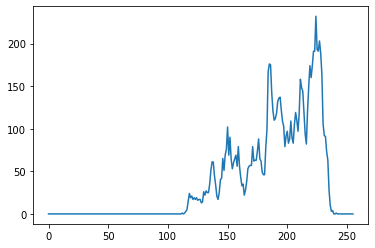

In [91]:
hist2 = cv2.calcHist(images=img, channels=[1], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist2);

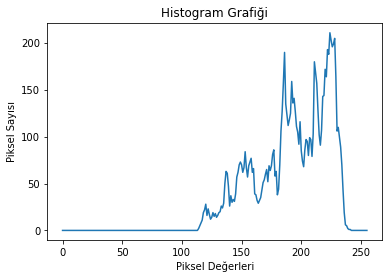

In [104]:
hist3 = cv2.calcHist(images=img, channels=[2], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist3);
plt.xlabel('Piksel Değerleri')
plt.ylabel('Piksel Sayısı')
plt.title('Histogram Grafiği')
plt.show();

## Resim üzerinde threshold yöntemi ile eşikleme işlemi yap.

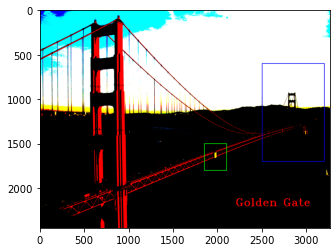

In [113]:
retval, threshold = cv2.threshold(src=img, thresh=170, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(X=threshold), plt.show();

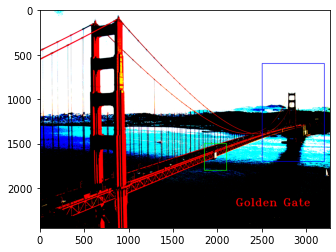

In [114]:
retval, threshold = cv2.threshold(src=img, thresh=120, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(X=threshold), plt.show();

## Resimdeki kenarları algılama işlemi yap.

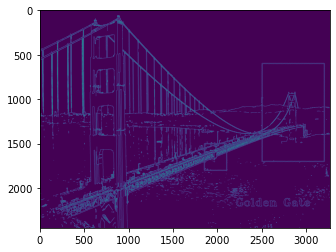

In [118]:
canny = cv2.Canny(image=img, threshold1=120, threshold2=220)
plt.imshow(X=canny), plt.show();

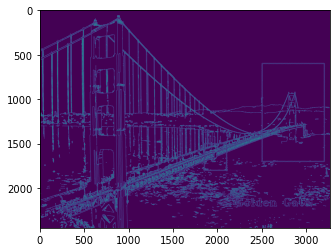

In [119]:
canny2 = cv2.Canny(image=img, threshold1=50, threshold2=200)
plt.imshow(X=canny2), plt.show();

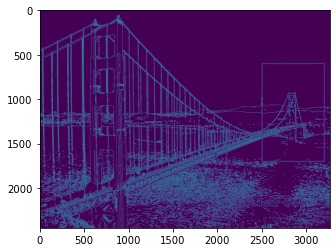

In [121]:
canny3 = cv2.Canny(image=img, threshold1=50, threshold2=120)
plt.imshow(X=canny3), plt.show();

## Perspektif dönüştürme işlemi yap

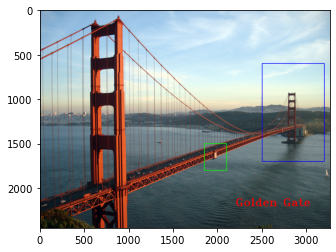

In [135]:
plt.imshow(X=img);

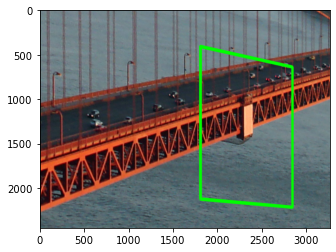

In [142]:
pts1 = np.float32([[1500, 1500], [1500, 2000], [2000, 1400], [2000, 2000]])
pts2 = np.float32([[10, 10], [10, img.shape[1]], [img.shape[0], 10], [img.shape[0], img.shape[1]]])

matrix = cv2.getPerspectiveTransform(src=pts1, dst=pts2)
imgOutput = cv2.warpPerspective(src=img, M=matrix, dsize=(img.shape[1], img.shape[0]))
plt.imshow(X=imgOutput);

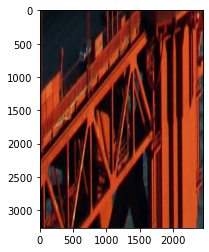

In [151]:
pts1 = np.float32([[500, 2000], [500, 2200], [1000, 2000], [1000, 2200]])
pts2 = np.float32([[10, 10], [10, img.shape[1]], [img.shape[0], 10], [img.shape[0], img.shape[1]]])

matris = cv2.getPerspectiveTransform(src=pts1, dst=pts2)
imgOutput = cv2.warpPerspective(src=img, M=matris, dsize=(img.shape[0], img.shape[1]))
plt.imshow(X=imgOutput);

## Resim üzerinde morfolojik operasyonlar gerçekleştir.

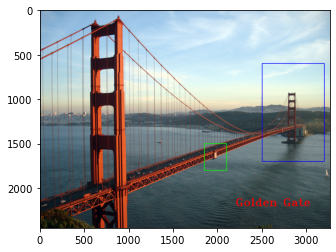

In [152]:
plt.imshow(X=img);

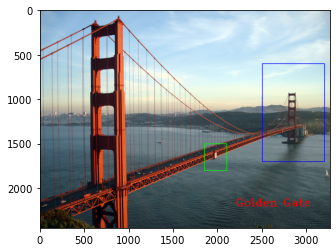

In [155]:
kernel = np.zeros((5, 5), np.uint8)
erode = cv2.morphologyEx(src=img, op=cv2.MORPH_ERODE, kernel=kernel)
plt.imshow(X=erode);

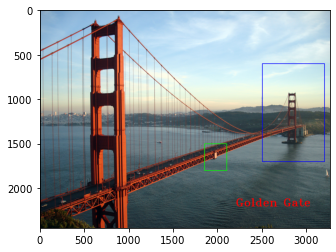

In [156]:
dilate = cv2.morphologyEx(src=img, op=cv2.MORPH_DILATE, kernel=kernel)
plt.imshow(X=dilate);

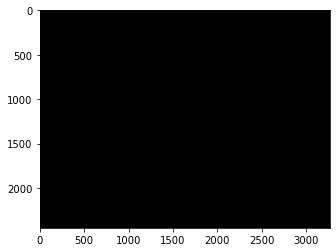

In [157]:
gradient = cv2.morphologyEx(src=img, op=cv2.MORPH_GRADIENT, kernel=kernel)
plt.imshow(X=gradient);